In [1]:
%%HTML
<style>
.container { width:100%  } 
</style>

# Predicting the Spread of Covid-19 with Linear Regression

The array `num_cases` contains the number of cases on successive days in the time period from February, the 25th up to the 13th of March 2020, i.e. `num_cases[0]` is the number of Covid-19 cases on the 25th of February and `num_cases[i]`is the number of Covid-19 cases `i` days after the 25th of February.  I have taken these data form the website <a href="http://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/">http://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/</a>.

In [2]:
num_cases = [16, 19, 24, 53, 66, 117, 150, 188, 240, 349, 534, 684, 847, 1112, 1565, 1966, 2745, 3675]

`m` is the number of data points.

In [3]:
m = len(num_cases)
m

18

We take the number of days after the 25th of February as x-values.

In [4]:
X = range(m)

In [5]:
list(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

To begin with, we plot the data.  To this end we have to load some libraries.

In [6]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

Text(0.5, 1.0, 'Number of Covid-19 cases versus date.')

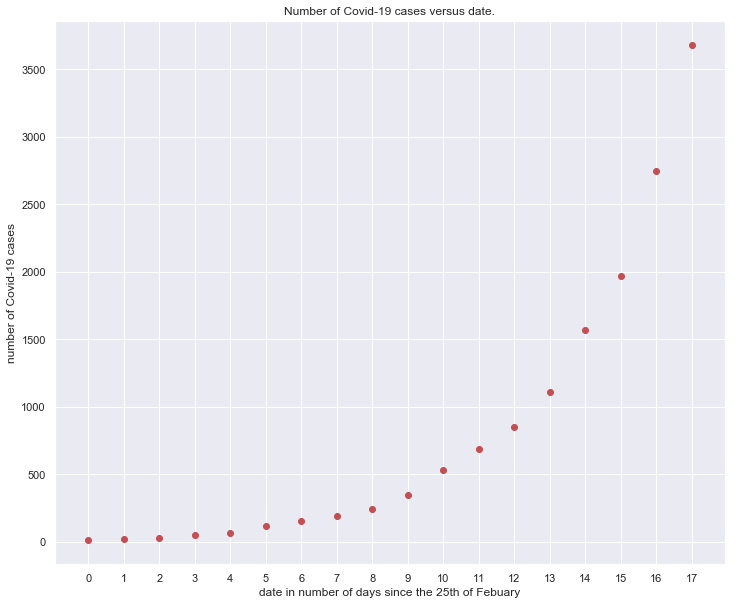

In [7]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
plt.xticks(ticks=X)
plt.scatter(X, num_cases, c='r') 
plt.xlabel('date in number of days since the 25th of Febuary')
plt.ylabel('number of Covid-19 cases')
plt.title('Number of Covid-19 cases versus date.')

This does not look exactly linear.  Rather, it might be exponential.  Hence, we take the logarithm of the number of cases and plot these logarithms with respect to the date.

In [8]:
import math

In [9]:
Y = [math.log(n) for n in num_cases]

Text(0.5, 1.0, 'Log of the Number of Covid-19 cases versus date.')

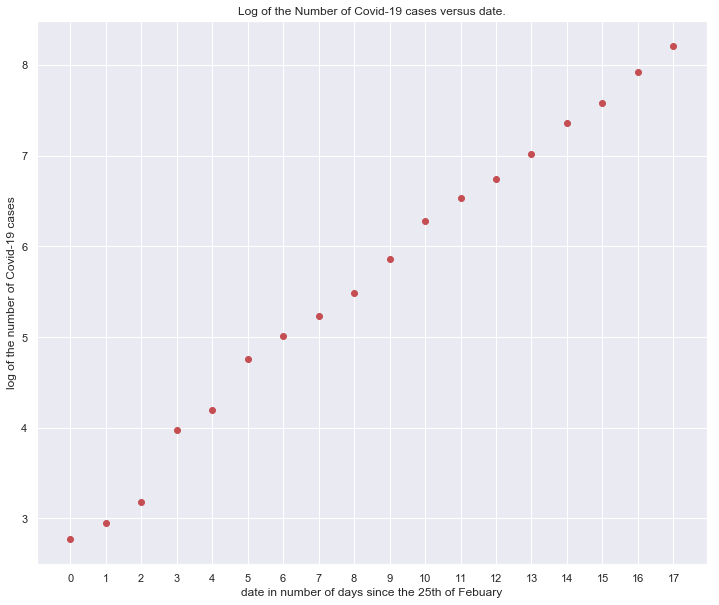

In [10]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
plt.xticks(ticks=X)
plt.scatter(X, Y, c='r') 
plt.xlabel('date in number of days since the 25th of Febuary')
plt.ylabel('log of the number of Covid-19 cases')
plt.title('Log of the Number of Covid-19 cases versus date.')

This looks better.   There seem to be a jumps at `x = 3` and `x = 5`.  These corresponds to the date of Friday, the 28th of February and Sunday, the 1st of March.  These dates coincide with the German *Carnival*.  This period might have enhanced the normal spreading of the disease.  Therefore, let us just take the data starting from the 1st of March.

To ease the computation, we transform our data into numpy vectors.  Note that we throw away the first 5 data.

In [11]:
X = np.array(X[5:])
Y = np.array(Y[5:])

In [12]:
X

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

We compute the average value of `X` according to the formula:
$$ \bar{\mathbf{x}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m x_i $$ 

In [13]:
xMean = np.mean(X)
xMean

11.0

We compute the average number of the logarithm of Covid-19 cases according to the formula:
$$ \bar{\mathbf{y}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m y_i $$ 

In [14]:
yMean = np.mean(Y)
yMean

6.459628779429664

The coefficient $\vartheta_1$ is computed according to the formula:
$$ \vartheta_1 = \frac{\sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr) \cdot \bigl(y_i - \bar{\mathbf{y}}\bigr)}{
                       \sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr)^2}  
$$

In [15]:
ϑ1 = np.sum((X - xMean) * (Y - yMean)) / np.sum((X - xMean) ** 2)
ϑ1

0.29126685720684314

The coefficient $\vartheta_0$ is computed according to the formula:
$$ \vartheta_0 = \bar{\mathbf{y}} - \vartheta_1 \cdot \bar{\mathbf{x}} $$ 

In [16]:
ϑ0 = yMean - ϑ1 * xMean
ϑ0

3.25569335015439

Let us plot the line $y(x) = ϑ0 + ϑ1 \cdot x$ together with our data:

Text(0.5, 1.0, 'Log of the Number of Covid-19 cases versus date.')

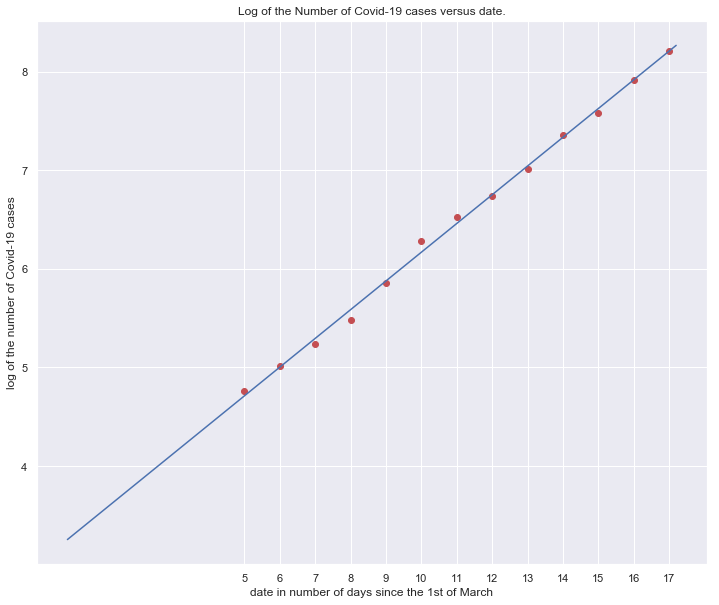

In [17]:
xMax = max(X) + 0.2
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
plt.xticks(ticks=X)
plt.scatter(X, Y, c='r')
plt.plot([0, xMax], [ϑ0, ϑ0 + ϑ1 * xMax], c='b')
plt.xlabel('date in number of days since the 1st of March')
plt.ylabel('log of the number of Covid-19 cases')
plt.title('Log of the Number of Covid-19 cases versus date.')

The blue line is not too far of the data points.  In order to judge the quality of our model we compute both the
<em style="color:blue">total sum of squares</em> and the <em style="color:blue">residual sum of squares</em>.

In [18]:
TSS = np.sum((Y - yMean) ** 2)

Next, we compute the *residual sum of squares* `RSS` as follows:
$$ \mathtt{RSS} := \sum\limits_{i=1}^m \bigl(\vartheta_1 \cdot x_i + \vartheta_0 - y_i\bigr)^2 $$
    

In [19]:
RSS = np.sum((ϑ1 * X + ϑ0 - Y) ** 2)

Now $R^2$ is calculated via the formula:
$$ R^2 = 1 - \frac{\mathtt{RSS}}{\mathtt{TSS}}$$

In [20]:
R2 = 1 - RSS/TSS
R2

0.9975594160875931

It seems that our model is a good approximation of the data.

Finally, let us make a prediction for the 16th of February. The logarithm of the number of cases $n$ on the 16th of March which is $20$ days after the 25th of February is predicted according to the formula:
$$ \ln(n) = \vartheta_1 \cdot 20 + \vartheta_0 $$
Hence, the number of cases $n$ for that day is predicted as
$$ n = \exp\bigl(\vartheta_1 \cdot 20 + \vartheta_0\bigr). $$

In [21]:
round(math.exp(ϑ1 * 20 + ϑ0))

8787

Our model predicts that there will be about $8,787$ cases by the end of Monday, the 16th of March.  Of course, as both local and state governments have introduced measures to impede the spreading of the disease, the actual number will be lower. 

In [22]:
round(math.exp(ϑ1 * 27 + ϑ0))

67501